### House Price Prediction

In [1]:
import sklearn as sk
from sklearn import datasets
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
BostonData = sk.datasets.load_boston()
df = pd.DataFrame(data=BostonData.data, columns = BostonData.feature_names)
df['Price'] = BostonData.target
df.head()
# A quick look at the features and the target variable (Price)
# You can view the description of each feature by looking at print(BostonData.DESCR)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Split into training and testing sets
dfTrain, dfTest, PriceTrain, PriceTest = sk.model_selection.train_test_split(df.loc[:, df.columns!='Price'], df.loc[:,'Price'], test_size = 0.25)
dfTest['Price'] = PriceTest
dfTrain['Price'] = PriceTrain
print(dfTrain.head()) # Notice how the data is now in random order. An effect of the splitting process
print("Proportion of Training Data",100*dfTrain.size/df.size,"%")

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
34    1.61282  0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
435  11.16040  0.0  18.10   0.0  0.740  6.629   94.6  2.1247  24.0  666.0   
145   2.37934  0.0  19.58   0.0  0.871  6.130  100.0  1.4191   5.0  403.0   
73    0.19539  0.0  10.81   0.0  0.413  6.245    6.2  5.2873   4.0  305.0   
477  15.02340  0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   

     PTRATIO       B  LSTAT  Price  
34      21.0  248.31  20.34   13.5  
435     20.2  109.85  23.27   13.4  
145     14.7  172.91  27.80   13.8  
73      19.2  377.17   7.54   23.4  
477     20.2  349.48  24.91   12.0  
Proportion of Training Data 74.9011857708 %


#### Ridge Regression

In [4]:
ridge = sk.linear_model.Ridge()

# Normalize the features

dfTestNorm = dfTest.loc[:, dfTest.columns != 'Price']
dfTrainNorm = dfTrain.loc[:, dfTrain.columns != 'Price']
dfTestNorm = (dfTestNorm - dfTestNorm.mean())/dfTestNorm.std()
dfTrainNorm = (dfTrainNorm - dfTrainNorm.mean())/dfTrainNorm.std()
dfTestNorm.tail() # Visualize the normalized features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
285,-0.366697,1.722426,-1.335759,-0.221802,-1.363718,0.233131,-1.214484,1.729681,-0.952415,-0.624241,-1.464139,0.366528,-0.624146
311,-0.291556,-0.510733,-0.188175,-0.221802,-0.044635,-0.302483,-0.485129,-0.636027,-0.611692,-0.600590,0.007852,0.388606,-0.953381
125,-0.351459,-0.510733,2.174498,-0.221802,0.270243,-0.522554,0.757218,-0.964195,-0.838841,-1.286474,0.340237,0.268295,0.338683
459,0.287900,-0.510733,1.041915,-0.221802,1.393591,-0.368828,0.617629,-0.596895,1.659796,1.539839,0.862556,0.388606,0.322587
284,-0.366880,3.143527,-1.227751,-0.221802,-1.270106,1.260669,-1.601845,1.729681,-0.952415,-0.712933,-1.464139,0.366528,-0.679750


In [5]:
X = dfTrainNorm
y = dfTrain['Price']
ridge.fit(X,y)
predictions = ridge.predict(dfTestNorm)
truth = dfTest['Price']

MSE = sum((truth-predictions)**2)/len(predictions) # Calculate the Mean Squared Error for comparison of methods

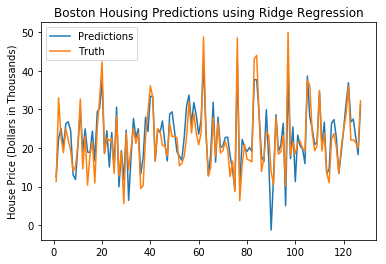

In [6]:
x = np.arange(1,len(truth)+1)
plt.plot(x, predictions, x, truth)
plt.legend(['Predictions', 'Truth'])
plt.ylabel('House Price (Dollars in Thousands)')
plt.title('Boston Housing Predictions using Ridge Regression')
plt.show()
